# BT3017 Tutorial 2

- There is an online copy<sup>+</sup> of this tutorial on github available [here](https://github.com/KohSiXing/Feature-Engineering-for-Machine-Learning/blob/master/BT3017%20Tutorial%202.ipynb)
- Datasets used from kaggle: [120 Years of Olympic History](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)

<sup>+</sup> Online copy will only be published after Wednesday 1000 of that week to prevent plagiarism.

### Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./athlete_events.csv") # read athlete_events.csv, store in dataframe df
df_noc_reg = pd.read_csv("./noc_regions.csv") # read noc_regions.csv, mainly used for referencing NOC column in df if needed
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### a) 

- My top 3 favorite sports are *Boxing*, *Fencing* and *Judo*

In [2]:
fav_sports = ["Boxing", "Fencing", "Judo"]

df_fav_sports = df[df["Sport"].isin(fav_sports)]
df_fav_sports.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
107,39,Lars Thorlaksn Aas,M,33.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",NaN
108,39,Lars Thorlaksn Aas,M,33.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Individual",NaN
109,39,Lars Thorlaksn Aas,M,33.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Team",NaN
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN


### b)

- The three questions I would ask regarding the data related to at least one of the sport will be:
    1. Are there any data inconsistencies?
        - For the Sports column, are there any errors in spelling (or whitespaces) that may affect filtering? e.g. Boxing vs Bxing
        - Each athlete should have a unique ID, as some athlete may be of the same name. Are there occurances of the same athlete assigned to 2 different IDs?
    2. Are there any duplicate observations in the dataframe of the selected sport, Boxing?
    3. What is the number of participants over the years?
        - Number of athletes participating in the sport for each year?
        - Number of athletes in each event of each year?

### c)

- Using `Pandas` and `Seaborn`, analyze and visualize the data to help answer the three questions raised in step (b) above

#### 1 Checking for data inconsistencies

- Sport selected is `Boxing`, need to check if there are spelling errors (or whitespaces) that could result in wrong filtering

In [3]:
# check for consistencies in spelling in the sports. There could be possibility of spelling inconsistencies like Boxing vs Bxing

[sport for sport in sorted(df["Sport"].unique().tolist()) if sport[0].upper() == "B"]

['Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Biathlon',
 'Bobsleigh',
 'Boxing']

- No spelling inconsistencies with "Boxing", can proceed to filter as normal. Use of `casefold`<sup>1</sup> to prevent case-sensitive filter and `strip` to remove whitespaces including `\t` as an added precaution

In [4]:
df_Boxing = df[df["Sport"].apply(lambda x : x.casefold().strip()) == "Boxing".casefold().strip()]
df_Boxing

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
151,57,Borislav Abadzhiev,M,24.0,176.0,66.0,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
179,77,Antoine Abang,M,27.0,166.0,75.0,Cameroon,CMR,1968 Summer,1968,Summer,Mexico City,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270814,135441,Rafael Zuiga Medrano,M,21.0,173.0,57.0,Colombia,COL,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Featherweight,NaN
270893,135472,Karl Zurflh,M,23.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Boxing,Boxing Men's Featherweight,NaN
270894,135473,Franco Zurlo,M,24.0,162.0,54.0,Italy,ITA,1964 Summer,1964,Summer,Tokyo,Boxing,Boxing Men's Bantamweight,NaN
270931,135486,Viktor Valeryevich Zuyev,M,21.0,188.0,91.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Heavyweight,Silver


**Check for columns that have N.A values. To be extra cautious should there be a need to analyze these columns**

- The subsequent analysis below does not touch the following features with N.A. values - Age, Height, Weight
- Medal (likely used as the label) can have its N.A. values i.e. no medal won replaced with "No Award" easily

In [5]:
df_Boxing.isnull().sum()

ID           0
Name         0
Sex          0
Age        318
Height    1469
Weight    1497
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     5103
dtype: int64

In [6]:
# Check if each athlete is only assigned to 1 unique ID as claimed by the dataset

print("ID Count: ",len(df_Boxing["ID"].unique().tolist()), "\nName Count: ", len(df_Boxing["Name"].unique().tolist()))
len(df_Boxing["Name"].unique().tolist()) == len(df_Boxing["ID"].unique().tolist())

ID Count:  5262 
Name Count:  5254


False

In [7]:
# Find the names with more than 1 ID

multiple_ID = []

for name in df_Boxing["Name"].unique().tolist():    
    if len(df_Boxing[df_Boxing["Name"] == name]["ID"].unique().tolist()) > 1:
        print(name, " : ", df_Boxing[df_Boxing["Name"] == name]["ID"].unique().tolist())
        multiple_ID.append(name)

Muhammad Ali  :  [2691, 2692]
Jitender Kumar  :  [64892, 64893]
Roberto Martnez  :  [75831, 75832]
Jzsef Nagy  :  [84169, 84170, 84171]
Peter Odhiambo  :  [88003, 88005, 88006]
Henry Perry  :  [93594, 93595]


- By comparing other columns such as **Age, Team, Games, Year** etc. we can confirm that these athletes with different IDs are indeed different persons with the same name. Thus there are no inconsistencies with the assignment of ID to these athletes

In [8]:
df_Boxing[df_Boxing["Name"].isin(multiple_ID)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4722,2691,Muhammad Ali,M,19.0,NaN,NaN,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Boxing,Boxing Men's Lightweight,NaN
4723,2692,Muhammad Ali,M,20.0,173.0,52.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,NaN
128904,64892,Jitender Kumar,M,23.0,171.0,81.0,India,IND,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN
128905,64892,Jitender Kumar,M,26.0,171.0,81.0,India,IND,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Light-Heavyweight,NaN
128906,64893,Jitender Kumar,M,20.0,160.0,51.0,India,IND,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Flyweight,NaN
151102,75831,Roberto Martnez,M,21.0,188.0,75.0,Honduras,HON,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,NaN
151103,75832,Roberto Martnez,M,22.0,171.0,67.0,Uruguay,URU,1960 Summer,1960,Summer,Roma,Boxing,Boxing Men's Welterweight,NaN
167527,84169,Jzsef Nagy,M,25.0,163.0,56.0,Hungary,HUN,1960 Summer,1960,Summer,Roma,Boxing,Boxing Men's Bantamweight,NaN
167528,84170,Jzsef Nagy,M,21.0,175.0,67.0,Hungary,HUN,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Welterweight,NaN
167529,84171,Jzsef Nagy,M,23.0,175.0,64.0,Hungary,HUN,1976 Summer,1976,Summer,Montreal,Boxing,Boxing Men's Light-Welterweight,NaN


#### 2 Checking for duplicated data in the dataframe

- If there are duplicated data, then the data in the sample cannot be considered as Independent and Identically Distributed (i.i.d) and may have issues when determining causal inference or building an ML model with it. As such, data duplication must be checked and removed before analysis begins
- The `duplicated`<sup>2</sup> function will be used

In [9]:
duplicates = df_Boxing[df_Boxing.duplicated()]
duplicates

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


#### 3 Based on the dataset, what is the participation over the years

- Find the number of (distinct i.e. different ID) athletes participating in the Olympics that year
- Ignore Event first, otherwise there will be double counts since some athletes participate in more that one event in the same year

In [10]:
# Drop off Event and Medal columns and then check for duplicated rows to be removed

df_B2 = df_Boxing.drop(["Event", "Medal"], axis=1)
df_B2[df_B2.duplicated(subset=["Year","ID"])]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport
69524,35435,George V. Finnegan,M,NaN,NaN,47.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Boxing
70618,35959,Frank Joseph Floyd,M,26.0,NaN,60.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Boxing
119928,60713,Oliver Leonard Kirk,M,20.0,NaN,52.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Boxing
144648,72600,"Joseph Patrick ""Joe"" Lydon",M,26.0,NaN,60.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Boxing
153367,76972,Charles Mayer,M,NaN,NaN,72.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Boxing
226144,113662,"Henry John ""Harry"" Spanjer",M,31.0,NaN,61.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Boxing


In [11]:
df_B2.drop_duplicates(keep="first", inplace = True)
df_B2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing
151,57,Borislav Abadzhiev,M,24.0,176.0,66.0,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing
179,77,Antoine Abang,M,27.0,166.0,75.0,Cameroon,CMR,1968 Summer,1968,Summer,Mexico City,Boxing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270814,135441,Rafael Zuiga Medrano,M,21.0,173.0,57.0,Colombia,COL,1984 Summer,1984,Summer,Los Angeles,Boxing
270893,135472,Karl Zurflh,M,23.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Boxing
270894,135473,Franco Zurlo,M,24.0,162.0,54.0,Italy,ITA,1964 Summer,1964,Summer,Tokyo,Boxing
270931,135486,Viktor Valeryevich Zuyev,M,21.0,188.0,91.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Boxing


In [12]:
df_Participation = pd.DataFrame(df_B2.groupby("Year").size()).reset_index()
df_Participation.columns = ["Year", "Participation"]
df_Participation

,Year,Participation
0,1904,18
1,1908,42
2,1920,116
3,1924,181
4,1928,144
5,1932,85
6,1936,179
7,1948,205
8,1952,249
9,1956,161


<AxesSubplot:xlabel='Year', ylabel='Participation'>

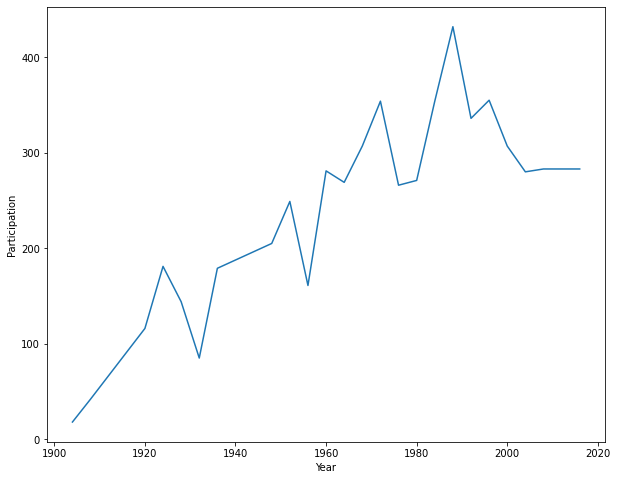

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x="Year", y="Participation", data=df_Participation, ax = ax)

- Find the number of athletes participating in each event of the Olympics for each year
- Events will be included here, hence the original dataframe `df_Boxing` will be used for grouping and processing

In [14]:
df_PE = df_Boxing.groupby(["Year", "Event"]).size()
df_PE = df_PE.unstack().fillna(0)
df_PE

Event,Boxing Men's Bantamweight,Boxing Men's Featherweight,Boxing Men's Flyweight,Boxing Men's Heavyweight,Boxing Men's Light-Flyweight,Boxing Men's Light-Heavyweight,Boxing Men's Light-Middleweight,Boxing Men's Light-Welterweight,Boxing Men's Lightweight,Boxing Men's Middleweight,Boxing Men's Super-Heavyweight,Boxing Men's Welterweight,Boxing Women's Flyweight,Boxing Women's Lightweight,Boxing Women's Middleweight
Year,,,,,,,,,,,,,,,
1904,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,8.0,2.0,0.0,4.0,0.0,0.0,0.0
1908,6.0,8.0,0.0,6.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0
1920,12.0,17.0,16.0,9.0,0.0,11.0,0.0,0.0,16.0,17.0,0.0,18.0,0.0,0.0,0.0
1924,21.0,24.0,19.0,15.0,0.0,20.0,0.0,0.0,30.0,23.0,0.0,29.0,0.0,0.0,0.0
1928,18.0,18.0,19.0,10.0,0.0,16.0,0.0,0.0,24.0,17.0,0.0,22.0,0.0,0.0,0.0
1932,10.0,10.0,12.0,6.0,0.0,8.0,0.0,0.0,13.0,10.0,0.0,16.0,0.0,0.0,0.0
1936,24.0,24.0,24.0,17.0,0.0,21.0,0.0,0.0,26.0,19.0,0.0,24.0,0.0,0.0,0.0
1948,30.0,30.0,26.0,17.0,0.0,24.0,0.0,0.0,27.0,25.0,0.0,26.0,0.0,0.0,0.0
1952,23.0,30.0,27.0,21.0,0.0,18.0,23.0,28.0,27.0,23.0,0.0,29.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Event', ylabel='Year'>

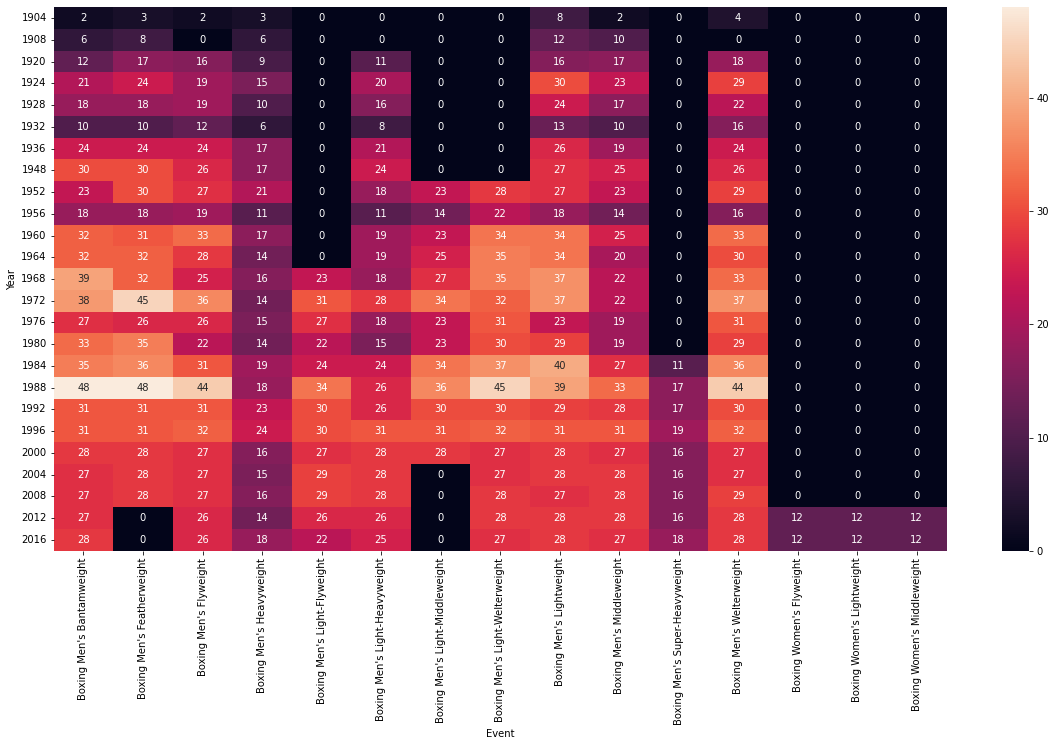

In [15]:
fig, ax = plt.subplots(figsize=(20,10))     
sns.heatmap(df_PE, annot=True, ax = ax)

- Based on the heatmap above, women started to participate in Olympic boxing events from 2012.
    - There are 12 participants (may include participants joining multiple events) for each event in 2012 and 2016
- The codes below will produce distinct athlete count participating in the Olympics for each year, **split by Sex**

In [16]:
df_Part_Gender = pd.DataFrame(df_B2.groupby(["Year", "Sex"]).size()).reset_index()
df_Part_Gender.columns = ["Year", "Sex", "Participation"]
df_Part_Gender

,Year,Sex,Participation
0,1904,M,18
1,1908,M,42
2,1920,M,116
3,1924,M,181
4,1928,M,144
5,1932,M,85
6,1936,M,179
7,1948,M,205
8,1952,M,249
9,1956,M,161


<AxesSubplot:xlabel='Year', ylabel='Participation'>

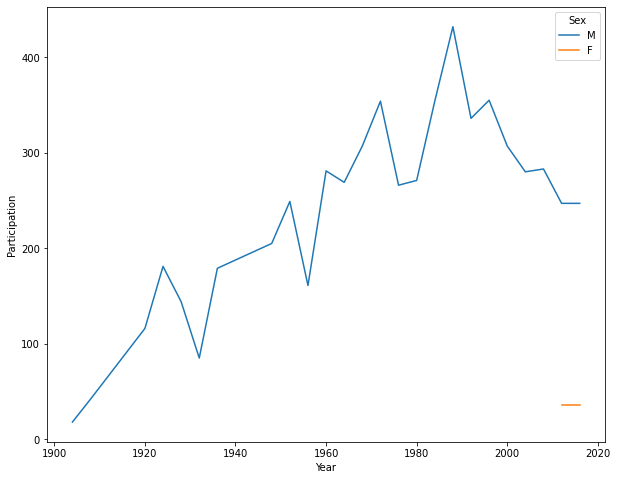

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x="Year", y="Participation", hue="Sex", data=df_Part_Gender, ax = ax)

### References

<sup>1</sup> Programiz. (n.d.). Python String casefold(). Retrieved January 27, 2022, from https://www.programiz.com/python-programming/methods/string/casefold 

<sup>2</sup> Varun, V. (n.d.). Thispointer. Pandas : Find duplicate rows in a Dataframe based on all or selected columns using DataFrame.duplicated() in Python. Retrieved January 27, 2022, from https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first' 